Non-autonomous systems
======================

All the ODE systems we have used in the examples thus far belong to the class of autonomous systems.
That is, the time variable $t$ never appears explicitly in the expressions of the right-hand sides of the
ODEs. In this section, we will see how non-autonomous systems can be defined and integrated in heyoka.py.

The dynamical system we will be focusing on is, again, a pendulum, but this time we will
spice things up a little by introducing a velocity-dependent damping effect and a time-dependent
external forcing. These additional effects create a rich and complex dynamical picture
which is highly sensitive to the initial conditions. See [here](http://pi.math.cornell.edu/~hubbard/pendulum.pdf)
for a detailed analysis of this dynamical system.

The ODE system of the forced damped pendulum reads:

$$
   \begin{cases}
   x^\prime = v \\
   v^\prime = \cos t - 0.1v - \sin(x)
   \end{cases}.
$$

The $\cos t$ term represents a periodic time-dependent forcing, while $-0.1v$
is a linear drag representing the effect of air on the pendulum's bob. We take as initial conditions

$$
   \begin{cases}
   x\left( 0 \right) = 0 \\
   v\left( 0 \right) = 1.85
   \end{cases}.
$$

That is, the pendulum is initially in the vertical position with a positive velocity.

The time variable is represented in heyoka.py's expression system by a special expression
called, in a dizzying display of inventiveness, {py:attr}`heyoka.time`. Because the name ``time`` is fairly
common, it is generally a good idea
to prepend the module name ``heyoka`` (or its usual abbreviation, ``hy``) when using
the ``time`` expression, in order to avoid ambiguities.
With that in mind, let's look at how the forced damped pendulum is defined in heyoka.py:

In [1]:
import heyoka as hy

# Create the symbolic variables x and v.
x, v = hy.make_vars("x", "v")

# Create the integrator object.
ta = hy.taylor_adaptive(
    # Definition of the ODE system:
    # x' = v
    # v' = cos(t) - 0.1*v - sin(x)
    sys=[(x, v), (v, hy.cos(hy.time) - 0.1 * v - hy.sin(x))],
    # Initial conditions for x and v.
    state=[0.0, 1.85],
    # Explicitly specify the
    # initial value for the time
    # variable.
    time=0.0,
)

ta

C++ datatype            : double
Tolerance               : 2.220446049250313e-16
High accuracy           : false
Compact mode            : false
Taylor order            : 20
Dimension               : 2
Time                    : 0
State                   : [0, 1.85]

Note that, for the sake of completeness, we passed an explicit initial value for the time
variable via the keyword argument ``time``. In this specific case, this is superfluous,
as the default initial value for the time variable is already zero.

We can now integrate the system for a few time units, checking how the value of $x$
varies in time:

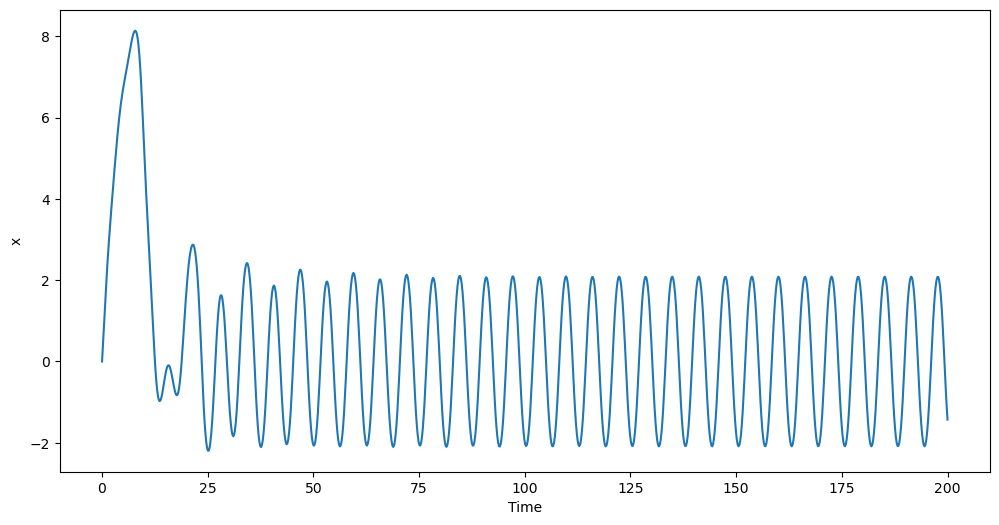

In [2]:
import numpy as np
from matplotlib.pylab import plt

fig = plt.figure(figsize=(12, 6))

# Construct a time grid from t=0 to t=200.
t_grid = np.linspace(0, 200, 1000)

# Propagate over the time grid.
x_hist = ta.propagate_grid(t_grid)[5][:, 0]

# Display the time evolution for the x variable.
plt.plot(t_grid, x_hist)
plt.xlabel("Time")
plt.ylabel("x");

After an initial excursion to higher values for $x$, the system seems to settle into a stable motion. Note that, because this system can exhibit chaotic behaviour, changing
the initial conditions by a small amount might lead to a qualitatively-different long-term behaviour.